## Results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob

In [2]:
from vbranch.utils.plot import *

Using TensorFlow backend.


In [5]:
with open('results/bagging/mnist-fcn.json', 'r') as f:
    results = json.load(f)

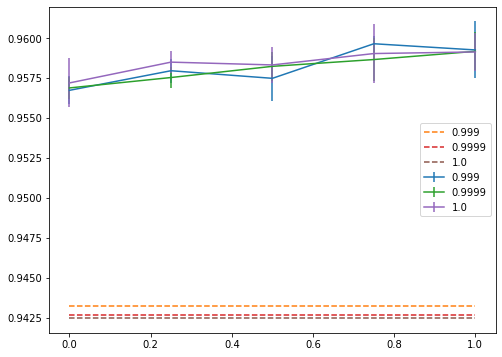

In [6]:
plt.figure(figsize=(8, 6))
plot_line(results, 2, p1=[0.999, 0.9999, 1.0])

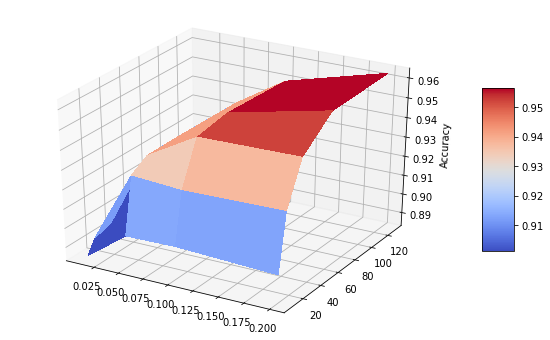

In [9]:
plot_baseline_3d(results['baseline'])

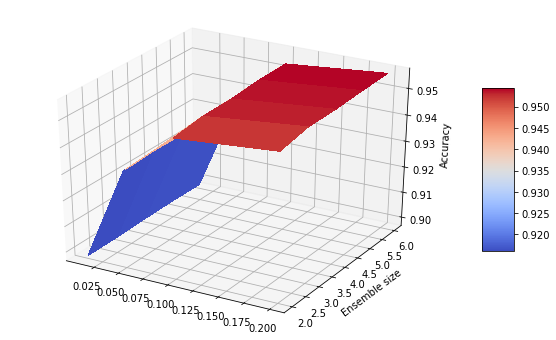

In [17]:
plot_ensemble_3d(results['ensemble'])

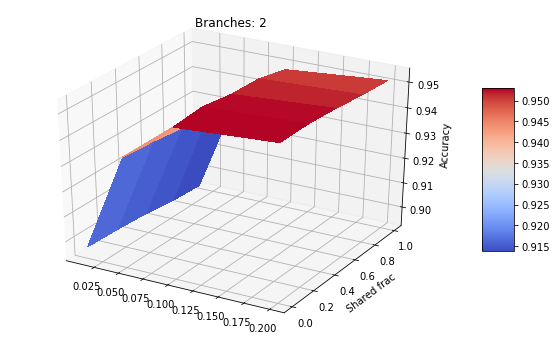

In [19]:
plot_vbranch_3d(results['vbranch'], 2)